<a href="https://colab.research.google.com/github/pritimaharjan/Animated_website/blob/main/customer_churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
data=pd.read_excel("/content/drive/MyDrive/customer_churn _analysis/Book1.xlsx",sheet_name="churn_data")

In [5]:
data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11098-MAD,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,...,Bank Withdrawal,95.099998,6683.399902,0.00,0,631.719971,7315.120117,Stayed,Others,Others
1,11114-PUN,Male,51,No,Punjab,5,9,Deal 5,Yes,No,...,Bank Withdrawal,49.150002,169.050003,0.00,10,122.370003,301.420013,Churned,Competitor,Competitor had better devices
2,11167-WES,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,...,Bank Withdrawal,116.050003,8297.500000,42.57,110,1872.979980,10237.910156,Stayed,Others,Others
3,11179-MAH,Male,35,No,Maharashtra,10,12,NaN,Yes,No,...,Credit Card,84.400002,5969.299805,0.00,0,219.389999,6188.689941,Stayed,Others,Others
4,11180-TAM,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,...,Credit Card,72.599998,4084.350098,0.00,140,332.079987,4556.430176,Stayed,Others,Others


In [6]:
# data processing
# dropping columns that are not needed for training machine

In [6]:
data=data.drop(["Customer_ID","Churn_Category","Churn_Reason"],axis=1)
# reason for droping these columns
# 'Customer_ID' is just the number that identifies the users
# Churn_Category","Churn_Reason" are the target values

In [9]:
data.columns

Index(['Customer_ID', 'Gender', 'Age', 'Married', 'State',
       'Number_of_Referrals', 'Tenure_in_Months', 'Value_deal',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue', 'Customer_Status', 'Churn_Category', 'Churn_Reason'],
      dtype='object')

In [7]:
data.columns

Index(['Gender', 'Age', 'Married', 'State', 'Number_of_Referrals',
       'Tenure_in_Months', 'Value_deal', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
       'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
       'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
       'Paperless_Billing', 'Payment_Method', 'Monthly_Charge',
       'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges',
       'Total_Long_Distance_Charges', 'Total_Revenue', 'Customer_Status'],
      dtype='object')

In [8]:
# list of columns tho be label encoded
columns_to_encode=['Gender', 'Age', 'Married', 'State',
       'Value_deal', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
       'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
       'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
       'Paperless_Billing', 'Payment_Method']

In [9]:
# model like random forest is bad at handling Categorical data.so we need to encode these colums
# ecoding all are columns manually is tidious job , hence label encoder is used to incode the columns


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
# encoding categorical variables
label_encoder = LabelEncoder()
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

In [14]:
data

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,0,12,1,11,0,31,0,1,0,1,...,2,0,0,95.099998,6683.399902,0.00,0,631.719971,7315.120117,Stayed
1,1,33,0,15,5,9,4,1,0,1,...,0,1,0,49.150002,169.050003,0.00,10,122.370003,301.420013,Churned
2,0,25,1,21,3,28,0,1,1,1,...,2,1,0,116.050003,8297.500000,42.57,110,1872.979980,10237.910156,Stayed
3,1,17,0,12,10,12,5,1,0,1,...,2,1,1,84.400002,5969.299805,0.00,0,219.389999,6188.689941,Stayed
4,1,57,1,17,12,27,1,1,0,1,...,2,1,1,72.599998,4084.350098,0.00,140,332.079987,4556.430176,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,0,21,0,12,2,14,5,1,1,1,...,0,0,0,65.199997,3687.850098,0.00,0,87.779999,3775.629883,Stayed
6003,0,42,1,21,11,26,3,1,0,0,...,1,0,0,19.650000,244.800003,0.00,0,430.690002,675.489990,Stayed
6004,1,41,1,10,8,18,5,1,0,1,...,0,0,0,69.699997,69.699997,0.00,0,21.520000,91.220001,Churned
6005,0,16,0,18,0,34,5,1,1,1,...,2,0,1,70.900002,4677.100098,0.00,0,1880.020020,6557.120117,Stayed


In [15]:
# encoding target variables (ie, customer_status)
data["Customer_Status"]=data["Customer_Status"].map({"Stayed":0,"Churned":1})

data["Customer_Status"]

,Customer_Status
0,0
1,1
2,0
3,0
4,0
...,...
6002,0
6003,0
6004,1
6005,0


In [16]:
# split data into feature and target
# x:-feature
# y:-target

In [17]:
x=data.drop("Customer_Status",axis=1)
y=data["Customer_Status"]
print(y)

0       0
1       1
2       0
3       0
4       0
       ..
6002    0
6003    0
6004    1
6005    0
6006    0
Name: Customer_Status, Length: 6007, dtype: int64


splitting the data(feature as well as target value ) into train and test ,
*  80% of data will be used to train the model
*  20% of data will be used to test the model
*  random_state=42

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Model building
* using RandomForestClassifier
* n_estimators=100 :


In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
model=RandomForestClassifier(n_estimators=100,random_state=42)



In [22]:
# training model
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [23]:
# evaluating model

y_predict=model.predict(x_test)

In [27]:
from sklearn.metrics  import accuracy_score

In [29]:
accuracy=accuracy_score(y_test,y_predict)

In [30]:
print(accuracy)

0.8377703826955075


In [31]:
from sklearn.metrics import confusion_matrix


In [32]:
cm = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[778  69]
 [126 229]]


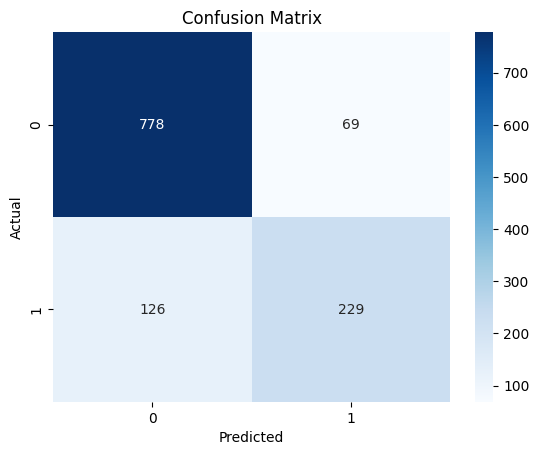

In [33]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()